In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def validation_data_preprocessing( direc="/content/drive/MyDrive/eye_new/test"):

  
    
  i=0
  IMG_SIZE = 150
  categories = ["Closed_Eye", "Open_Eye"]
  s=categories[0]
  for category in categories:
    
    path_link = os.path.join(direc, category)
    class_num1 = categories.index(category)
    for image in os.listdir(path_link):
      
      image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
      resized_array = cv2.resize(image_array, (IMG_SIZE,IMG_SIZE))
      if category==s:
        
        cv2.imwrite("/content/drive/MyDrive/drowsiness_detection/test/Closed_Eye/%04i.jpg" %i,resized_array)
      else:
        
        cv2.imwrite("/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/%04i.jpg" %i,resized_array)
                
               
      i=i+1
                
   
validation_data_preprocessing()


In [ ]:
img1=cv2.imread("/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/0119.jpg")
img1.shape

(150, 150, 3)

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/0223.jpg")
img1.shape

(150, 150, 3)

In [ ]:
def train_data_preprocessing( direc="/content/drive/MyDrive/eye_new/train"):

  
    
  i=0
  IMG_SIZE = 150
  categories = ["Closed_Eye", "Open_Eye"]
  s=categories[0]
  for category in categories:
    
    path_link = os.path.join(direc, category)
    class_num1 = categories.index(category)
    for image in os.listdir(path_link):
      
      image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
      resized_array = cv2.resize(image_array, (IMG_SIZE,IMG_SIZE))
      if category==s:
        
        cv2.imwrite("/content/drive/MyDrive/drowsiness_detection/train/Closed_Eye/%04i.jpg" %i,resized_array)
      else:
        
        cv2.imwrite("/content/drive/MyDrive/drowsiness_detection/train/Open_Eye/%04i.jpg" %i,resized_array)
                
               
      i=i+1
                
   
train_data_preprocessing()


In [ ]:
img2=cv2.imread("/content/drive/MyDrive/drowsiness_detection/train/Open_Eye/2639.jpg")
img2.shape


(150, 150, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
img_width,img_height=150,150
train_data_dir='/content/drive/MyDrive/drowsiness_detection/train'
validation_data_dir='/content/drive/MyDrive/drowsiness_detection/test'
nb_train_samples=5257
nb_validation_samples=228
epochs=15
batch_size=350
if K.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)
    

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 5257 images belonging to 2 classes.


In [ ]:
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 226 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples // batch_size,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 1601s 103s/step - loss: 0.6709 - accuracy: 0.5931
Epoch 2/15
15/15 [==============================] - 36s 3s/step - loss: 0.5010 - accuracy: 0.7191
Epoch 3/15
15/15 [==============================] - 36s 2s/step - loss: 0.2436 - accuracy: 0.9195
Epoch 4/15
15/15 [==============================] - 35s 2s/step - loss: 0.1552 - accuracy: 0.9500
Epoch 5/15
15/15 [==============================] - 35s 2s/step - loss: 0.2057 - accuracy: 0.9217
Epoch 6/15
15/15 [==============================] - 36s 2s/step - loss: 0.1322 - accuracy: 0.9574
Epoch 7/15
15/15 [==============================] - 36s 2s/step - loss: 0.1182 - accuracy: 0.9643
Epoch 8/15
15/15 [==============================] - 35s 2s/step - loss: 0.0968 - accuracy: 0.9699
Epoch 9/15
15/15 [==============================] - 35s 2s/step - loss: 0.0781 - accuracy: 0.9777
Epoch 10/15
15/15 [==============================] - 35s 3s/step - loss: 0.1265 - accuracy: 0.9583
Epoch 11/15
15/

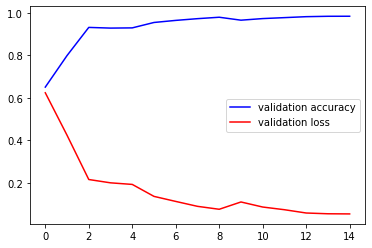

In [ ]:
accuracy = history.history['accuracy']

loss = history.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="validation accuracy")
plt.plot(epochs, loss, "r", label="validation loss")
plt.legend()
plt.show()



In [ ]:

img_pred=image.load_img('/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/0117.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[1.]]


(150, 150, 3)

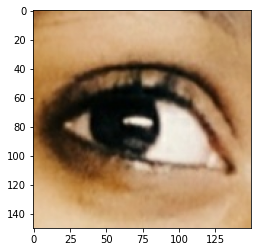

In [ ]:

img1=cv2.imread("/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/0117.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img1)           # get b, g, r
rgb_img1 = cv2.merge([r,g,b])
plt.imshow(rgb_img1)
img1.shape


In [ ]:

img_pred=image.load_img('/content/drive/MyDrive/drowsiness_detection/test/Closed_Eye/0000.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[0.]]


(150, 150, 3)

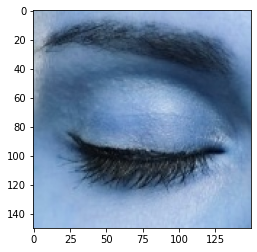

In [ ]:

img1=cv2.imread("/content/drive/MyDrive/drowsiness_detection/test/Closed_Eye/0000.jpg")
plt.imshow(img1)
img1.shape

In [ ]:

img_pred=image.load_img('/content/drive/MyDrive/drowsiness_detection/test/Closed_Eye/0007.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[0.]]


(150, 150, 3)

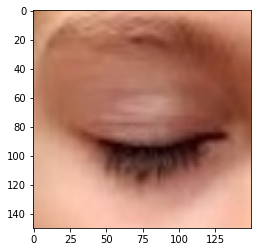

In [ ]:

img1=cv2.imread("/content/drive/MyDrive/drowsiness_detection/test/Closed_Eye/0007.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img1)           # get b, g, r
rgb_img1 = cv2.merge([r,g,b])
plt.imshow(rgb_img1)
img1.shape


In [ ]:

img_pred=image.load_img('/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/0148.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[1.]]


(150, 150, 3)

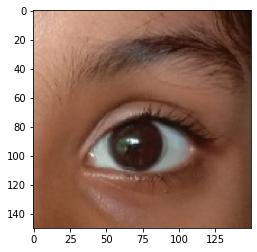

In [ ]:

img1=cv2.imread("/content/drive/MyDrive/drowsiness_detection/test/Open_Eye/0148.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img1)           # get b, g, r
rgb_img1 = cv2.merge([r,g,b])
plt.imshow(rgb_img1)
img1.shape


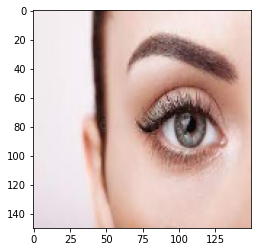

In [ ]:
img_test=cv2.imread("/content/image1.jpg")
width=150
height=150
dim=(width,height)
resized_img=cv2.resize(img_test,dim)
b,g,r=cv2.split(resized_img)
resized_img=cv2.merge([r,g,b])
plt.imshow(resized_img)

In [ ]:


img_pred=image.img_to_array(resized_img)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[1.]]


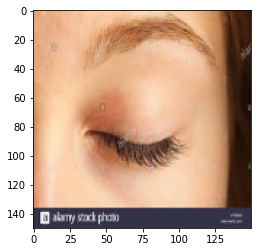

In [ ]:
img_test=cv2.imread("/content/image2.jpg")
width=150
height=150
dim=(width,height)
resized_img=cv2.resize(img_test,dim)
b,g,r=cv2.split(resized_img)
resized_img=cv2.merge([r,g,b])
plt.imshow(resized_img)

In [ ]:


img_pred=image.img_to_array(resized_img)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
rslt=model.predict(img_pred)
print(rslt)

[[0.]]
